<a href="https://colab.research.google.com/github/FaraazArsath/Decision-Tree/blob/main/Decision_Tree_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Decision Tree Regression
<pre>
The data concerns city-cycle fuel consumption in miles per gallon(mpg)                                                                                     

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
df = pd.read_csv("auto-mpg.csv")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


**Data Pre-processing**

In [123]:
df.shape

(398, 9)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [125]:
df['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [126]:
(df.horsepower.value_counts())['?']

6

In [127]:
df = df.loc[df.horsepower != '?',:]
df.shape

(392, 9)

In [128]:
df['horsepower'] = df['horsepower'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 30.6+ KB


Checking for missing values

In [129]:
df.isnull().sum().sum()

0

Checking for duplicates

In [130]:
df.duplicated().sum()

0

In [131]:
# Looking to unique values of feature 'car name'
df['car name'].nunique()

301

In [132]:
# dropping feature 'car name' as out of 392 entries almost 301 are uniques 

df = df.drop(columns='car name')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 27.6 KB


Detecting outliers

In [133]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [134]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

mpg              0
cylinders        0
displacement     0
horsepower      10
weight           0
acceleration    11
model year       0
origin           0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


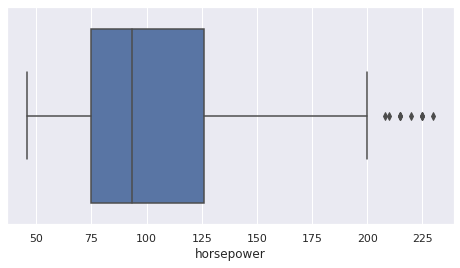

In [135]:
sns.boxplot(df['horsepower'])
plt.show()

In [136]:
df.loc[df['horsepower'] > 200]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
6,14.0,8,454.0,220,4354,9.0,70,1
7,14.0,8,440.0,215,4312,8.5,70,1
8,14.0,8,455.0,225,4425,10.0,70,1
13,14.0,8,455.0,225,3086,10.0,70,1
25,10.0,8,360.0,215,4615,14.0,70,1
27,11.0,8,318.0,210,4382,13.5,70,1
67,11.0,8,429.0,208,4633,11.0,72,1
94,13.0,8,440.0,215,4735,11.0,73,1
95,12.0,8,455.0,225,4951,11.0,73,1
116,16.0,8,400.0,230,4278,9.5,73,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


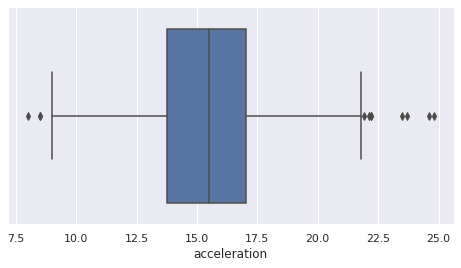

In [137]:
sns.boxplot(df['acceleration'])
plt.show()

In [138]:
df.loc[(df['acceleration'] > 22) | (df['acceleration'] < 9)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
7,14.0,8,440.0,215,4312,8.5,70,1
9,15.0,8,390.0,190,3850,8.5,70,1
11,14.0,8,340.0,160,3609,8.0,70,1
59,23.0,4,97.0,54,2254,23.5,72,2
195,29.0,4,85.0,52,2035,22.2,76,1
196,24.5,4,98.0,60,2164,22.1,76,1
299,27.2,4,141.0,71,3190,24.8,79,2
300,23.9,8,260.0,90,3420,22.2,79,1
326,43.4,4,90.0,48,2335,23.7,80,2
394,44.0,4,97.0,52,2130,24.6,82,2


Observation:
1. Outliers in **acceleration** seems to be random nothing conclusive
2. Outliers in **horsepower** are not seeming random,
   * All of them has 8 cylinders
   * All of them  has origin as 1
   * Most of them has weight in the range 4000
   * Most of them has displacement in the range 400

**EDA**

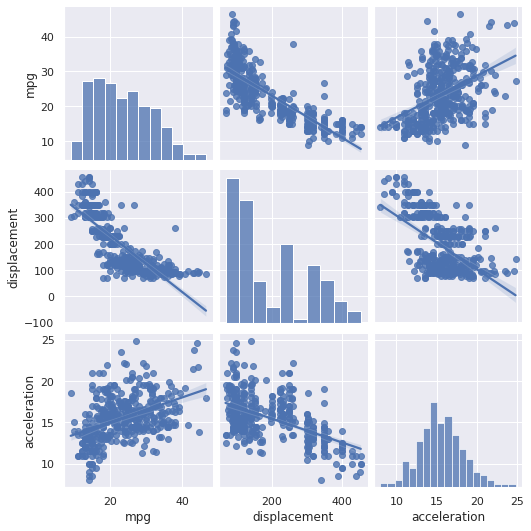

In [139]:
# multivariate analysis of continous variables
sns.pairplot(df.drop(columns=['cylinders','horsepower','weight','model year','origin']),kind='reg')
plt.show()

Observations 

Graph illustrates that there is a negative correlation between **mpg** and **displacement**. 

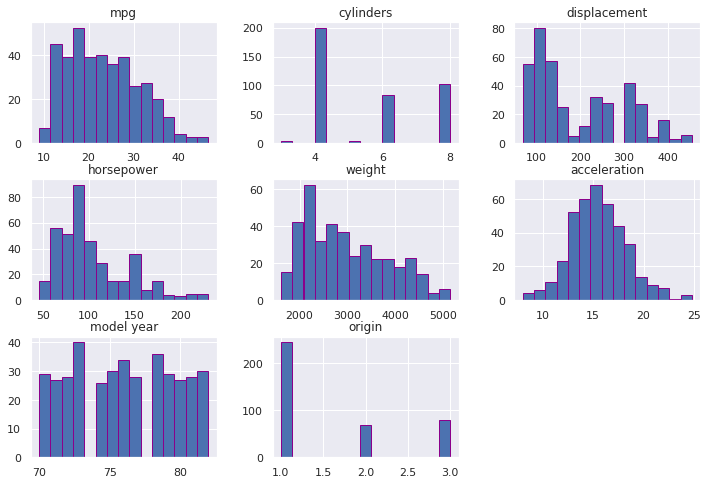

In [140]:
# univariate analysis 
df.hist(figsize=(12,8),bins=15,edgecolor='darkmagenta')
plt.show()

Observations:

1. **acceleration** of the cars in the data is normally distributed and most of the cars have an acceleration of 15
2. Most of cars have **cylinders** value as 4 
3. Dependent variable **mpg** is slightly skewed to the right.
4. **cylinders** , **origin** and **model year** are having discrete values with categorically finite numbers.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


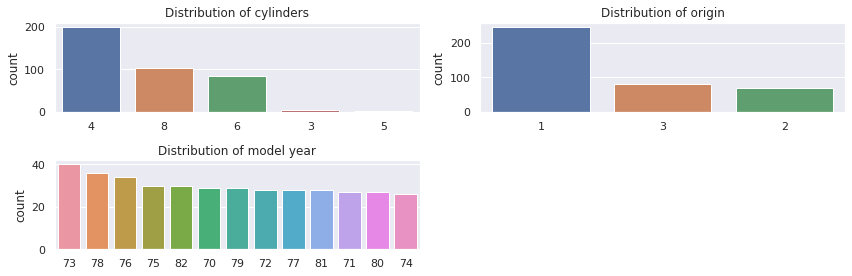

In [141]:
# Analysis of Distribution 
fig = plt.figure(1, (12, 4))
for i,cat in enumerate(df.reindex(columns = ['cylinders','origin','model year'])):
 ax = plt.subplot(2,2,i+1)
 sns.countplot(df[cat], order=df[cat].value_counts().index)
 ax.set_xlabel(None)
 ax.set_title(f'Distribution of {cat}')
 plt.tight_layout()
plt.show()

In [142]:
 # calculate proportion of dominant classes in each category
num_rows, num_cols = df.shape
for i,cat in enumerate(df.reindex(columns = ['cylinders','origin','model year'])):
  val_counts = df[cat].value_counts()
  dominant_frac = val_counts.iloc[0] / num_rows
  print(f'`{val_counts.index[0]}` alone contributes to {round(dominant_frac * 100, 2)}% of {cat}')

`4` alone contributes to 50.77% of cylinders
`1` alone contributes to 62.5% of origin
`73` alone contributes to 10.2% of model year


Observation:

**cylinders** and **origin** is highly imbalanced

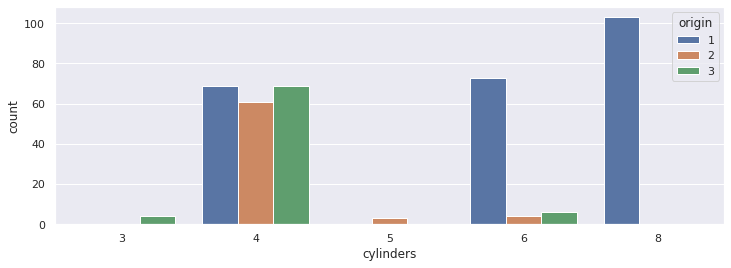

In [143]:
# analysing cylinders and origin 
fig = plt.figure(figsize=(12, 4))
sns.countplot(data=df, x="cylinders", hue="origin")
plt.show()

Observation:

1. cylinders 8 is available only in origin 1
2. cylinders 5 is available only in origin 2
3. cylinders 3 is available only in origin 3
4. cylinders 4 and 6 is available in all origin

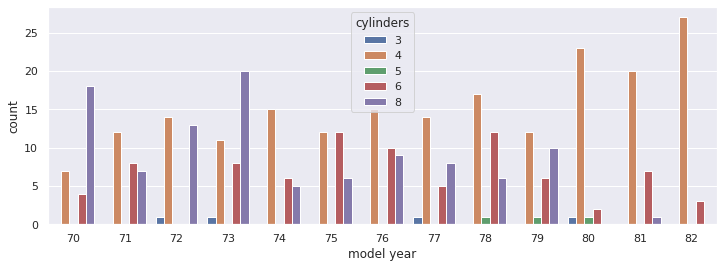

In [144]:
# analysing cylinders and model year
fig = plt.figure(figsize=(12, 4))
sns.countplot(data=df, x="model year", hue="cylinders")
plt.show()

Observations:

1. As the year progresses vehicles with more cylinders 8 and 6 decreases significantly.
2. One important thing to be noticed that throughout the years vehicles with 4 cylinders have significant proportion and infact in the model year 80's
most of the vehicles has 4 cylinders.

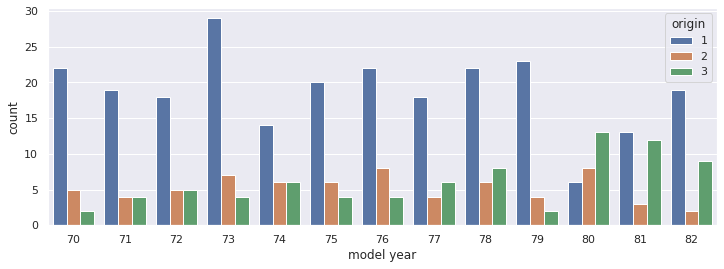

In [145]:
# analysing origin and model year
fig = plt.figure(figsize=(12, 4))
sns.countplot(data=df, x="model year", hue="origin")
plt.show()

Observations:

1. Origin 1 is dominating almost in all years except model year 80.

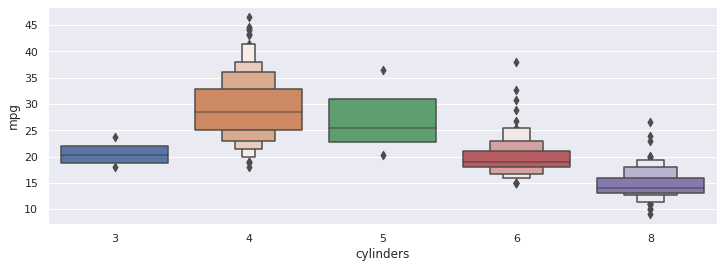

In [146]:
# Analyzing cylinders and dependent variable 'mpg'
fig = plt.figure(figsize=(12, 4))
sns.boxenplot(data=df, x="cylinders", y="mpg")
plt.show()

Observations:

1. With increase in cylinders 'mpg' value is decreasing.
2. cylinders 4 are giving highest 'mpg' values.

Text(0.5, 0.98, ' auto-mpg Correlation Heatmap')

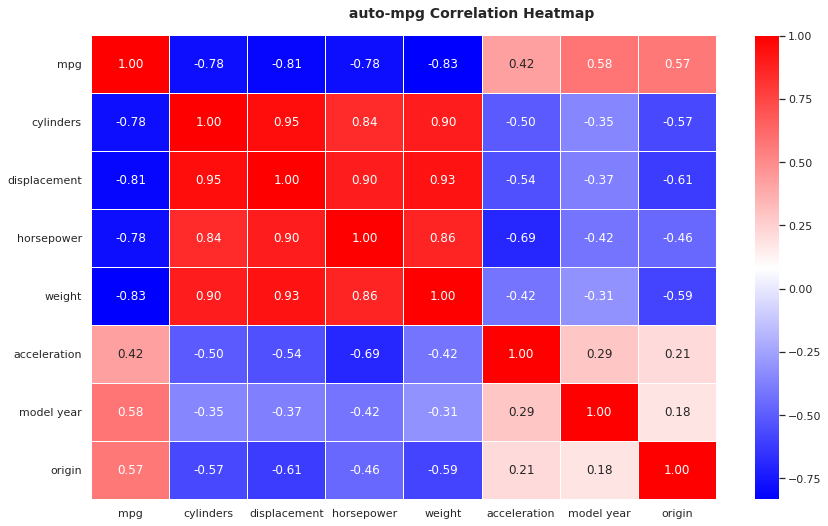

In [147]:
# Finding correlation

fig, (ax) = plt.subplots(1, 1, figsize=(14,8)) 
hm = sns.heatmap(df.corr(),
                 ax=ax,
                 cmap="bwr",
                 annot=True,
                 fmt='.2f',linewidths=.05)
fig.subplots_adjust(top=0.93) 
fig.suptitle(' auto-mpg Correlation Heatmap', fontsize=14, fontweight='bold') 


Observations:
1. Independent variables such as **acceleration** , **model year** and **origin** are positively correlated with dependent variable **mpg**
2. **cylinders** is haing negative correlation with **mpg** which is also evident from boxen plot where we noted when cylinders increases mpg value decreases.
3. **mpg** is having negative correlation with **displacement** , **horsepower** and **weight**
2. Independent variables **cylinders**, **displacement** , **horsepower** and **weight** are all have strong positive corelations with each others.

Will take all the features to fit model for prediction and analyze the accuracy

**Splitting the datasets into training sets and Test sets**

In [148]:
X = df.drop(columns = 'mpg')
y = df['mpg']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=10)

In [149]:
X_train.shape , y_train.shape

((313, 7), (313,))

In [150]:
X_test.shape , y_test.shape

((79, 7), (79,))

**Fitting Decision Tree**

In [151]:
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor()
clf.fit(X_train,y_train)

DecisionTreeRegressor()

In [152]:
y_predict = clf.predict(X_test)
y_predict

array([25. , 27.2, 15. , 39.1, 15.5, 19.2, 13. , 12. , 31.3, 19. , 17. ,
       15. , 27. , 33.5, 14. , 14. , 20. , 29. , 14. , 14. , 15.5, 38. ,
       19. , 16. , 14. , 13. , 16. , 30. , 22.5, 22. , 20.6, 22.5, 26.6,
       20.2, 20.2, 30. , 44.3, 19.9, 15. , 28.4, 22.5, 17. , 34.3, 26.4,
       18. , 16. , 13. , 37. , 19.8, 30. , 20. , 13. , 19. , 17.5, 14. ,
       38. , 22.5, 24. , 28. , 21.1, 37.2, 23. , 17.5, 18. , 29.8, 32. ,
       12. , 31.6, 23. , 13. , 14. , 32.2, 21.1, 31. , 44.6, 21.6, 19. ,
       17.5, 26. ])

**Evaluating Decision Tree**

In [153]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_predict)
print("Test R2_Score : {:.2f}".format(r2))

Test R2_Score : 0.75


**Reducing Overfitting**

In [154]:
# reducing overfitting by finding best 'max_depth' hyperparameter using hit-trai and cross validation 

from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

for i in [1,2,3,4,5,6,7,8,9,10,20]:
  dt = DecisionTreeRegressor(max_depth=i,random_state=10)
  dt.fit(X_train,y_train)
  y_hat = dt.predict(X_train)
  trainaccuracy = r2_score(y_train,y_hat)
  crossval = cross_val_score(dt,X_train,y_train,cv=10,scoring = make_scorer(r2_score))
  print("Depth : " , i, " Train r2_score : ", trainaccuracy , " Cross Validation score : ", np.mean(crossval))

Depth :  1  Train r2_score :  0.5750756731304745  Cross Validation score :  0.546141627022323
Depth :  2  Train r2_score :  0.7394089091139651  Cross Validation score :  0.7006472845431306
Depth :  3  Train r2_score :  0.8641748132121618  Cross Validation score :  0.8212523562903529
Depth :  4  Train r2_score :  0.9052414707716565  Cross Validation score :  0.8252899126132325
Depth :  5  Train r2_score :  0.930581819295462  Cross Validation score :  0.8226972638621379
Depth :  6  Train r2_score :  0.9517264211601274  Cross Validation score :  0.8160098314126607
Depth :  7  Train r2_score :  0.9679210026524561  Cross Validation score :  0.8055771575194941
Depth :  8  Train r2_score :  0.9825584444152813  Cross Validation score :  0.7951773096600301
Depth :  9  Train r2_score :  0.9912486265522852  Cross Validation score :  0.7937103962156485
Depth :  10  Train r2_score :  0.9968336403488418  Cross Validation score :  0.7872747887691598
Depth :  20  Train r2_score :  1.0  Cross Validatio

Here Depth - 4 is the best hyper parameter.

**Feature Importance**

In [155]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=10)
dt = DecisionTreeRegressor(max_depth=4)
dt.fit(X_train,y_train)
importance = dt.feature_importances_ 
list(zip(importance,X_test.columns)) 

[(0.0, 'cylinders'),
 (0.6393270502586512, 'displacement'),
 (0.039977456997517265, 'horsepower'),
 (0.175483571909287, 'weight'),
 (0.00738581793644776, 'acceleration'),
 (0.13782610289809685, 'model year'),
 (0.0, 'origin')]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


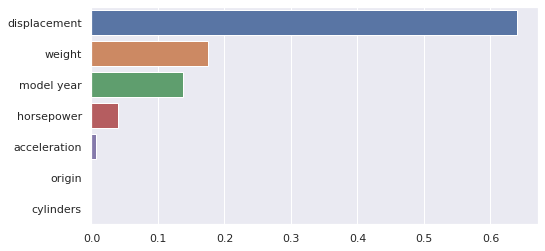

In [156]:
import seaborn as sns

feature_importances = dt.feature_importances_

# Sort the feature importances from greatest to least using the sorted indices
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_names = X.columns[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

# Create a bar plot of the feature importances
sns.set(rc={'figure.figsize':(8,4)})
sns.barplot(sorted_importances, sorted_feature_names)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


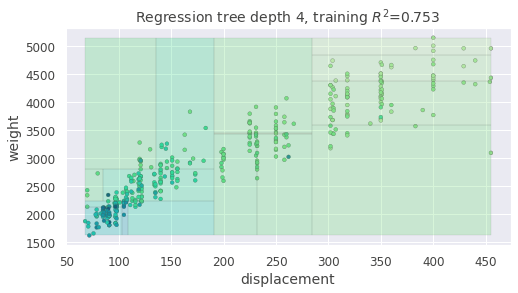

In [170]:
# Regression bivariate feature-target space heatmap
from sklearn.tree import DecisionTreeRegressor
from dtreeviz.trees import *

X = df[['displacement','weight']]
y = df['mpg']

dt = DecisionTreeRegressor(max_depth=4, criterion="mae")
dt.fit(X, y)

t = rtreeviz_bivar_heatmap(dt,
                           X, y,
                           feature_names=['displacement', 'weight'],
                           fontsize=14)

plt.show()

**Visualizing Decision-Tree Regression**

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


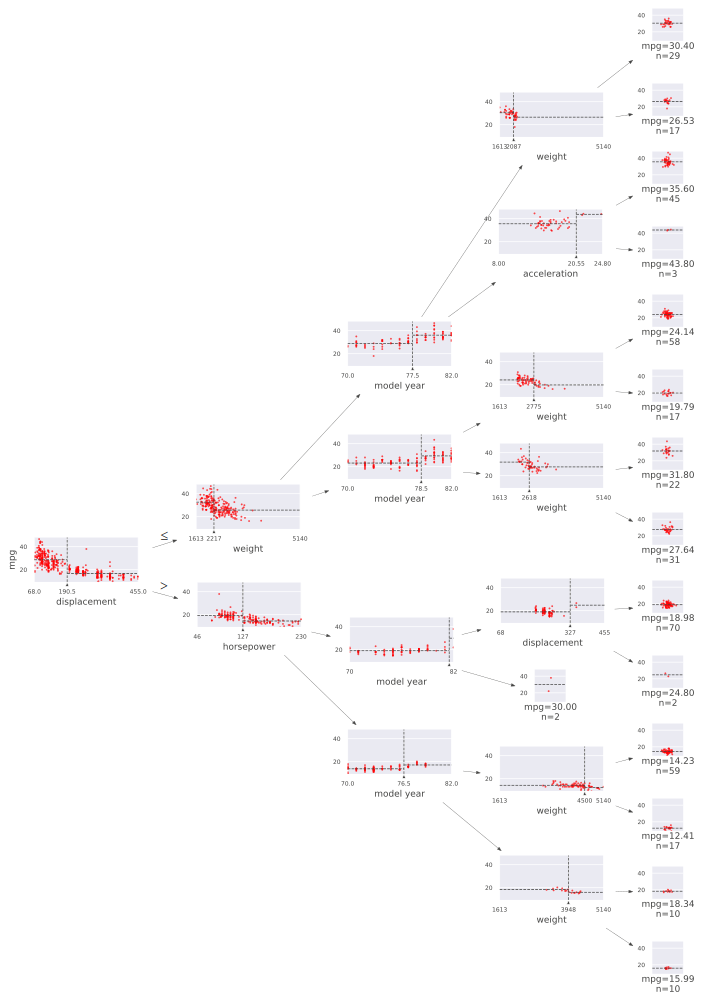

In [168]:
from sklearn import tree
from dtreeviz.trees import dtreeviz


viz = dtreeviz(dt, X, y,
                target_name="mpg",
                feature_names=X_test.columns,
               orientation ='LR',
                colors={'scatter_marker': '#ff0004'})
viz